<a href="https://colab.research.google.com/github/CAVASOL/aiffel_quest/blob/main/ML_node/ML_with_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ML Project: AirBnB New York city 가격 예측하기**  
* EDA  
* Data Preprocessing  
* ML(Regression) model fitting & predict  

**1. Baseline - 라이브러리와 데이터 불러오기**

In [ ]:
# Lib
import pandas as pd

In [ ]:
# Dataset
train = pd.read_csv('/aiffel/data/train.csv')
test = pd.read_csv('/aiffel/data/test.csv')
# y_test = pd.read_csv('/aiffel/data/y_test.csv')

**2. EDA(탐색적 데이터 분석) - 탐색적으로 데이터 살펴보기**

In [ ]:
# Dataset size
train.shape, test.shape

((39116, 16), (9779, 15))

In [ ]:
# Data sample
display(train.head(2))
display(test.head(2))

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,14963583,Room in South Harlem near Central Park,94219511,Gilles,Manhattan,Harlem,40.80167,-73.95781,Private room,70,3,3,2019-01-01,0.09,2,0
1,9458704,"Large 1BR Apartment, near Times Sq (2nd Floor)",49015331,Iradj,Manhattan,Hell's Kitchen,40.76037,-73.99016,Entire home/apt,240,2,64,2019-06-30,1.68,2,262


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,30913224,"Cozy and Sunny Room Williamsburg, Luxury Building",33771081,Rémy,Brooklyn,Williamsburg,40.70959,-73.94652,Private room,3,2,2019-05-08,0.31,1,0
1,971247,Sunny Artist Live/Work Apartment,5308961,Larry,Manhattan,Upper West Side,40.79368,-73.96487,Entire home/apt,3,159,2019-07-03,2.09,1,244


In [ ]:
# Data type
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39116 entries, 0 to 39115
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39116 non-null  int64  
 1   name                            39104 non-null  object 
 2   host_id                         39116 non-null  int64  
 3   host_name                       39099 non-null  object 
 4   neighbourhood_group             39116 non-null  object 
 5   neighbourhood                   39116 non-null  object 
 6   latitude                        39116 non-null  float64
 7   longitude                       39116 non-null  float64
 8   room_type                       39116 non-null  object 
 9   price                           39116 non-null  int64  
 10  minimum_nights                  39116 non-null  int64  
 11  number_of_reviews               39116 non-null  int64  
 12  last_review                     

In [ ]:
# Null(train)
train.isnull().sum()

id                                   0
name                                12
host_id                              0
host_name                           17
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       7994
reviews_per_month                 7994
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [ ]:
# Null(test)
test.isnull().sum()

id                                   0
name                                 4
host_id                              0
host_name                            4
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
minimum_nights                       0
number_of_reviews                    0
last_review                       2058
reviews_per_month                 2058
calculated_host_listings_count       0
availability_365                     0
dtype: int64

<AxesSubplot:>

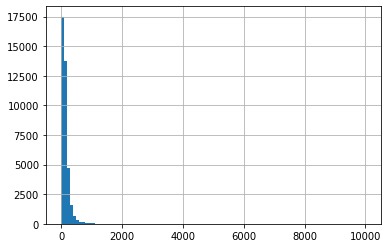

In [ ]:
# target(hist)
train['price'].hist(bins=100)

In [ ]:
# target(describe)
train['price'].describe()

count    39116.000000
mean       152.751150
std        241.752501
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# feature(host_id)
train['host_id'].value_counts()

219517861    256
107434423    181
30283594      99
137358866     82
12243051      80
            ... 
73369106       1
26620387       1
176660539      1
26004891       1
2609535        1
Name: host_id, Length: 30845, dtype: int64

**3. 데이터 전처리 - 데이터를 살펴보고 판단하여 결측치 및 이상치를 처리**

In [ ]:
# 결측치 컬럼 삭제(last_review)
# train = train.drop(columns=['last_review'])
# test = test.drop(columns=['last_review'])

train = train.drop('last_review', axis=1)
test = test.drop('last_review', axis=1)

In [ ]:
# 결측치 채우기
# train['reviews_per_month'].fillna(0, inplace=True)
# test['reviews_per_month'].fillna(0, inplace=True)

train['reviews_per_month'] = train['reviews_per_month'].fillna(0)
test['reviews_per_month'] = test['reviews_per_month'].fillna(0)

In [ ]:
# 결측치 확인
print(train.isnull().sum())
print(test.isnull().sum())

id                                 0
name                              12
host_id                            0
host_name                         17
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64
id                                0
name                              4
host_id                           0
host_name                         4
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0


In [ ]:
# 가격 값 복사
# y_train = train['price'].copy()

target = train['price']
train = train.drop('price', axis=1)

In [ ]:
# 수치형 피처 선택
numerical_cols = ['host_id', 'latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']

train = train[numerical_cols]
test = test[numerical_cols]

**4. 검증 데이터 분리 - Train 데이터로 학습(훈련), Validation(검증용) 데이터로 예측**

In [ ]:
# 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train, target, test_size=0.2, random_state=2022)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((31292, 8), (7824, 8), (31292,), (7824,))

**5. 머신러닝**

In [ ]:
# 머신러닝(회귀)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)
pred = lr.predict(X_val)
mse = mean_squared_error(y_val, pred)
print(mse)

32000.4623726053


In [ ]:
# 릿지 회귀
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)  # You can tune the alpha value
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_val)
mse_ridge = mean_squared_error(y_val, pred_ridge)
print(mse_ridge)

32002.921365825365


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:156: LinAlgWarning: Ill-conditioned matrix (rcond=3.06762e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [ ]:
# 라쏘 회귀
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_val)
mse_lasso = mean_squared_error(y_val, pred_lasso)
print(mse_lasso)

32695.606216284894


In [ ]:
# 엘라스틱넷 회귀
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)
pred_elastic = elastic_net.predict(X_val)
mse_elastic = mean_squared_error(y_val, pred_elastic)
print(mse_elastic)

33521.06875602843


In [ ]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred_rf= rf.predict(X_val)
mse_rf = mean_squared_error(y_val, pred_rf)
print(mse_rf)

32431.396398542947


In [ ]:
# Xgboost
from xgboost import XGBRegressor

xgboost = XGBRegressor(n_estimators=50, random_state=2022)
xgboost.fit(X_train, y_train)
pred_xgboost = xgboost.predict(X_val)
mse_xgboost = mean_squared_error(y_val, pred_xgboost)
print(mse_xgboost)

30854.728654977484


**6. 채점**

In [ ]:
# test 데이터 예측 및 평가
y_test = pd.read_csv('/aiffel/data/y_test.csv')

# Xgboost
n_pred = xgboost.predict(test)
mean_squared_error(y_test, n_pred)

50706.07011590477

In [ ]:
# baseline score(mse 51xxx) 보다 점수가 낮게 나오도록 도전해 보세요!
print(f"나의 점수는 {mse_xgboost_test} 입니다.")

나의 점수는 50864.56910040246 입니다.
